# Using LittleVGG for Emotion Detection

### Training Emotion Detector Class FersCore

In [1]:
from __future__ import print_function
import tensorflow.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
os.environ["CUDA_VISIBLE_DEVICES"]="0" # Will use only the first GPU device

num_classes = 6
img_rows, img_cols = 48, 48
batch_size = 128

train_data_dir = './fer2013/train'
validation_data_dir = './fer2013/validation'

# Let's use some data augmentaiton 
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=10,
      shear_range=0.3,
      zoom_range=0.3,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=False,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        color_mode = 'grayscale',
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        color_mode = 'grayscale',
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2856746350799937080
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4174381056
locality {
  bus_id: 1
  links {
  }
}
incarnation: 282740263803363703
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1660 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
xla_global_id: 416903419
]
Found 28273 images belonging to 6 classes.
Found 3534 images belonging to 6 classes.


## Keras Imports

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import ELU
from tensorflow.keras.layers import Activation, Flatten, Dropout, Dense

## Keras LittleVGG Model Class VGG Model

In [3]:
# model = Sequential()

# model.add(Conv2D(32, (5, 5), padding = 'same', kernel_initializer="he_normal",
#                  input_shape = (img_rows, img_cols, 1)))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(32, (5, 5), padding = "same", kernel_initializer="he_normal", 
#                  input_shape = (img_rows, img_cols, 1)))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))

# # Block #2: second CONV => RELU => CONV => RELU => POOL
# # layer set
# model.add(Conv2D(32, (5, 5), padding="same", kernel_initializer="he_normal"))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(64, (5, 5), padding="same", kernel_initializer="he_normal"))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))

# # Block #3: third CONV => RELU => CONV => RELU => POOL
# # layer set
# model.add(Conv2D(64, (5, 5), padding="same", kernel_initializer="he_normal"))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(128, (3, 3), padding="same", kernel_initializer="he_normal"))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))

# # Block #4: third CONV => RELU => CONV => RELU => POOL
# # layer set
# model.add(Conv2D(128, (3, 3), padding="same", kernel_initializer="he_normal"))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(128, (3, 3), padding="same", kernel_initializer="he_normal"))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))

# # Block #5: first set of FC => RELU layers
# model.add(Flatten())
# model.add(Dense(64, kernel_initializer="he_normal"))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

# # Block #6: second set of FC => RELU layers
# model.add(Dense(64, kernel_initializer="he_normal"))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

# # Block #6: softmax classifier
# model.add(Dense(num_classes, kernel_initializer="he_normal"))
# model.add(Activation("softmax"))

# print(model.summary())
net = Sequential(name='DCNN')

net.add(
    Conv2D(
        filters=64,
        kernel_size=(5,5),
        input_shape=(img_rows, img_cols, 1),
        activation='elu',
        padding='same',
        kernel_initializer='he_normal',
        name='conv2d_1'
    )
)
net.add(BatchNormalization(name='batchnorm_1'))
net.add(
    Conv2D(
        filters=64,
        kernel_size=(5,5),
        activation='elu',
        padding='same',
        kernel_initializer='he_normal',
        name='conv2d_2'
    )
)
net.add(BatchNormalization(name='batchnorm_2'))

net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_1'))
net.add(Dropout(0.4, name='dropout_1'))

net.add(
    Conv2D(
        filters=128,
        kernel_size=(3,3),
        activation='elu',
        padding='same',
        kernel_initializer='he_normal',
        name='conv2d_3'
    )
)
net.add(BatchNormalization(name='batchnorm_3'))
net.add(
    Conv2D(
        filters=128,
        kernel_size=(3,3),
        activation='elu',
        padding='same',
        kernel_initializer='he_normal',
        name='conv2d_4'
    )
)
net.add(BatchNormalization(name='batchnorm_4'))

net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_2'))
net.add(Dropout(0.4, name='dropout_2'))

net.add(
    Conv2D(
        filters=256,
        kernel_size=(3,3),
        activation='elu',
        padding='same',
        kernel_initializer='he_normal',
        name='conv2d_5'
    )
)
net.add(BatchNormalization(name='batchnorm_5'))
net.add(
    Conv2D(
        filters=256,
        kernel_size=(3,3),
        activation='elu',
        padding='same',
        kernel_initializer='he_normal',
        name='conv2d_6'
    )
)
net.add(BatchNormalization(name='batchnorm_6'))

net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_3'))
net.add(Dropout(0.5, name='dropout_3'))

net.add(Flatten(name='flatten'))

net.add(
    Dense(
        128,
        activation='elu',
        kernel_initializer='he_normal',
        name='dense_1'
    )
)
net.add(BatchNormalization(name='batchnorm_7'))

net.add(Dropout(0.6, name='dropout_4'))

net.add(
    Dense(
        num_classes,
        activation='softmax',
        name='out_layer'
    )
)

net.summary()

Model: "DCNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        1664      
                                                                 
 batchnorm_1 (BatchNormaliza  (None, 48, 48, 64)       256       
 tion)                                                           
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 64)        102464    
                                                                 
 batchnorm_2 (BatchNormaliza  (None, 48, 48, 64)       256       
 tion)                                                           
                                                                 
 maxpool2d_1 (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 64)        0      

## Training our model Class training 

In [6]:
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

                     
checkpoint = ModelCheckpoint("G:\Emotion detection model\TrainedModel\working_final_model.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=11,
    verbose=1,
    restore_best_weights=True,
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1,
)

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint, reduce_lr]

# We use a very small learning rate 
net.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics = ['accuracy'])

nb_train_samples = 28273
nb_validation_samples = 3534
epochs = 50

history = net.fit(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

Epoch 1/50
220/220 [==============================] - ETA: 0s - loss: 2.0838 - accuracy: 0.2420
Epoch 00001: val_loss improved from inf to 1.69037, saving model to G:\Emotion detection model\TrainedModel\working_final_model.h5
220/220 [==============================] - 607s 3s/step - loss: 2.0838 - accuracy: 0.2420 - val_loss: 1.6904 - val_accuracy: 0.2922 - lr: 0.0010
Epoch 2/50
220/220 [==============================] - ETA: 0s - loss: 1.7045 - accuracy: 0.3121
Epoch 00002: val_loss improved from 1.69037 to 1.61102, saving model to G:\Emotion detection model\TrainedModel\working_final_model.h5
220/220 [==============================] - 20s 90ms/step - loss: 1.7045 - accuracy: 0.3121 - val_loss: 1.6110 - val_accuracy: 0.3472 - lr: 0.0010
Epoch 3/50
220/220 [==============================] - ETA: 0s - loss: 1.5662 - accuracy: 0.3755
Epoch 00003: val_loss improved from 1.61102 to 1.53658, saving model to G:\Emotion detection model\TrainedModel\working_final_model.h5
220/220 [===========

220/220 [==============================] - ETA: 0s - loss: 0.9630 - accuracy: 0.6376
Epoch 00026: val_loss did not improve from 1.35312
220/220 [==============================] - 25s 114ms/step - loss: 0.9630 - accuracy: 0.6376 - val_loss: 1.3927 - val_accuracy: 0.5590 - lr: 0.0010
Epoch 27/50
220/220 [==============================] - ETA: 0s - loss: 0.9667 - accuracy: 0.6378
Epoch 00027: val_loss did not improve from 1.35312
220/220 [==============================] - 25s 111ms/step - loss: 0.9667 - accuracy: 0.6378 - val_loss: 1.3975 - val_accuracy: 0.5666 - lr: 0.0010
Epoch 28/50
220/220 [==============================] - ETA: 0s - loss: 0.9456 - accuracy: 0.6460
Epoch 00028: val_loss did not improve from 1.35312
220/220 [==============================] - 26s 117ms/step - loss: 0.9456 - accuracy: 0.6460 - val_loss: 1.4654 - val_accuracy: 0.5498 - lr: 0.0010
Epoch 29/50
220/220 [==============================] - ETA: 0s - loss: 0.9463 - accuracy: 0.6443
Epoch 00029: val_loss did not 

### Class Evaluation

Found 3534 images belonging to 6 classes.
Confusion Matrix
[[286  34  19  82  65   5]
 [ 62 220  16  77 113  40]
 [  9  14 777  43  23  13]
 [ 88  72 155 144 111  56]
 [ 36  32  22 166 333   5]
 [ 10  39  22  24   9 312]]
Classification Report
              precision    recall  f1-score   support

       Angry       0.58      0.58      0.58       491
        Fear       0.54      0.42      0.47       528
       Happy       0.77      0.88      0.82       879
     Neutral       0.27      0.23      0.25       626
         Sad       0.51      0.56      0.53       594
    Surprise       0.72      0.75      0.74       416

    accuracy                           0.59      3534
   macro avg       0.56      0.57      0.57      3534
weighted avg       0.57      0.59      0.58      3534



<Figure size 576x576 with 0 Axes>

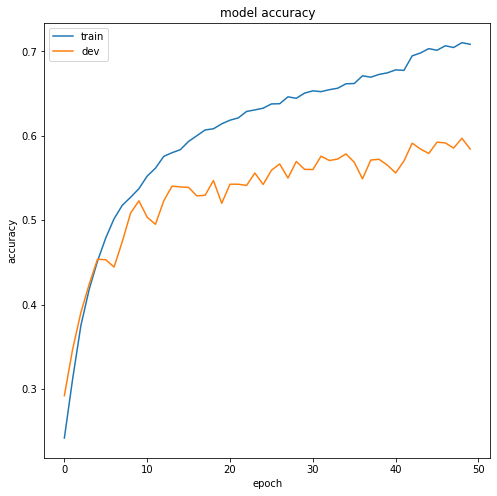

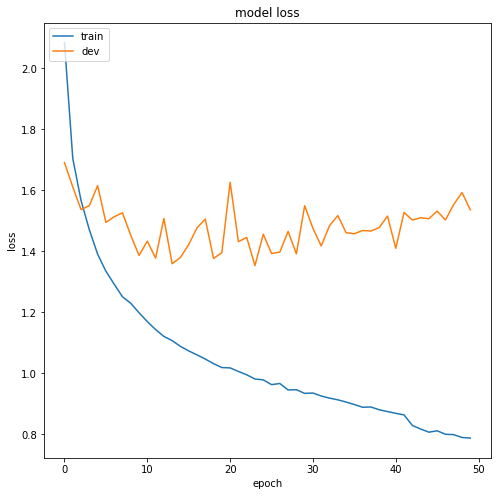

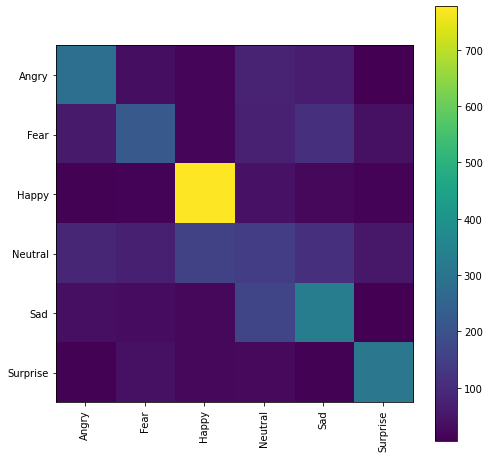

In [7]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

nb_train_samples = 28273
nb_validation_samples = 3534

# We need to recreate our validation generator with shuffle = false
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        color_mode = 'grayscale',
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

#Confution Matrix and Classification Report
Y_pred = net.predict(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)

# summarize history for accuracy
plt.figure(figsize=(8,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='upper left')
plt.show()

# summarize history for loss
plt.figure(figsize=(8,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='upper left')
plt.show()

plt.figure(figsize=(8,8))
plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

# list all data in history
# print(history.history.keys())

### Loading our saved model

In [8]:
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

classifier = load_model('G:\Emotion detection model\TrainedModel\working_final_model.h5')

### Getting our emotions

In [9]:
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        color_mode = 'grayscale',
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())
print(class_labels)

Found 3534 images belonging to 6 classes.
{0: 'Angry', 1: 'Fear', 2: 'Happy', 3: 'Neutral', 4: 'Sad', 5: 'Surprise'}


### Trying on validation images

In [12]:
from keras.models import load_model
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from keras.preprocessing import image
import numpy as np
import os
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join
import re

def draw_test(name, pred, im, true_label):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(im, 160, 0, 0, 300 ,cv2.BORDER_CONSTANT,value=BLACK)
    cv2.putText(expanded_image, "predited - "+ pred, (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2)
    cv2.putText(expanded_image, "true - "+ true_label, (20, 120) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,255,0), 2)
    cv2.imshow(name, expanded_image)


def getRandomImage(path, img_width, img_height):
    """function loads a random images from a random folder in our test path """
    folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0,len(folders))
    path_class = folders[random_directory]
    file_path = path + path_class
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    random_file_index = np.random.randint(0,len(file_names))
    image_name = file_names[random_file_index]
    final_path = file_path + "/" + image_name
    return image.load_img(final_path, target_size = (img_width, img_height),color_mode = "grayscale"), final_path, path_class

# dimensions of our images
img_width, img_height = 48, 48

# We use a very small learning rate 
net.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(learning_rate = 0.001),
              metrics = ['accuracy'])

files = []
predictions = []
true_labels = []

# predicting images
for i in range(0, 20):
    path = './fer2013/validation/' 
    img, final_path, true_label = getRandomImage(path, img_width, img_height)
    files.append(final_path)
    true_labels.append(true_label)
    x = image.img_to_array(img)
    x = x * 1./255
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = np.argmax(net.predict(images), axis=-1)
    predictions.append(classes)
    
for i in range(0, len(files)):
    image = cv2.imread((files[i]))
    image = cv2.resize(image, None, fx=3, fy=3, interpolation = cv2.INTER_CUBIC)
    draw_test("Prediction", class_labels[predictions[i][0]], image, true_labels[i])
    cv2.waitKey(0)

cv2.destroyAllWindows()

### Test on a single image

In [ ]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import os
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join
from keras.preprocessing.image import img_to_array

face_classifier = cv2.CascadeClassifier('./Haarcascades/haarcascade_frontalface_default.xml')

def face_detector(img):
    # Convert image to grayscale
    gray = cv2.cvtColor(img.copy(),cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    if faces == ():
        return (0,0,0,0), np.zeros((48,48), np.uint8), img
    
    allfaces = []   
    rects = []
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_gray = cv2.resize(roi_gray, (48, 48), interpolation = cv2.INTER_AREA)
        allfaces.append(roi_gray)
        rects.append((x,w,y,h))
    return rects, allfaces, img

img = cv2.imread("punte.jpg")
imS = cv2.resize(img, (500, 500))                    # Resize image
rects, faces, image = face_detector(imS)

i = 0
for face in faces:
    roi = face.astype("float") / 255.0
    roi = img_to_array(roi)
    roi = np.expand_dims(roi, axis=0)

    # make a prediction on the ROI, then lookup the class
    preds = classifier.predict(roi)[0]
    label = class_labels[preds.argmax()]   

    #Overlay our detected emotion on our pic
    label_position = (rects[i][0] + int((rects[i][1]/2)), abs(rects[i][2] - 10))
    i =+ 1
    cv2.putText(image, label, label_position , cv2.FONT_HERSHEY_SIMPLEX,1, (0,255,0), 2)
    
cv2.imshow("Emotion Detector", image)
cv2.waitKey(0)

cv2.destroyAllWindows()

### Let's try this on our webcam


In [13]:
import cv2
import numpy as np
from time import sleep
from keras.preprocessing.image import img_to_array

face_classifier = cv2.CascadeClassifier('./Haarcascades/haarcascade_frontalface_default.xml')

def face_detector(img):
    # Convert image to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    if faces == ():
        return (0,0,0,0), np.zeros((48,48), np.uint8), img
    
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]

    try:
        roi_gray = cv2.resize(roi_gray, (48, 48), interpolation = cv2.INTER_AREA)
    except:
        return (x,w,y,h), np.zeros((48,48), np.uint8), img
    return (x,w,y,h), roi_gray, img

cap = cv2.VideoCapture(0)
 
while True:

    ret, frame = cap.read()
    rect, face, image = face_detector(frame)
    if np.sum([face]) != 0.0:
        roi = face.astype("float") / 255.0
        roi = img_to_array(roi)
        roi = np.expand_dims(roi, axis=0)

        # make a prediction on the ROI, then lookup the class
        preds = classifier.predict(roi)[0]
        label = class_labels[preds.argmax()]  
        label_position = (rect[0] + int((rect[1]/2)), rect[2] + 25)
        cv2.putText(image, label, label_position , cv2.FONT_HERSHEY_SIMPLEX,2, (0,255,0), 3)
    else:
        cv2.putText(image, "No Face Found", (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,2, (0,255,0), 3)
        
    cv2.imshow('All', image)
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break
        
cap.release()
cv2.destroyAllWindows()      

C:\Users\offro\AppData\Local\Temp\ipykernel_9496\2133958708.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if faces == ():


In [ ]:
cap.release()
cv2.destroyAllWindows()      